# Importing Libraries and Reading the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import matplotlib.pyplot as plt

In [2]:
#Reading the data from the input filr
data = pd.read_csv("Country-data.csv",sep=",", encoding="ISO-8859-1", header=0)

In [3]:
#Displaying the data
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# basics of the df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
#converting "Export","imports" and "health" columns to their actual values 
data["exports"] = data["exports"] * data["gdpp"]
data["imports"] = data["imports"] * data["gdpp"]
data["health"] = data["health"] * data["gdpp"]
data 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610,9.44,56.2,5.82,553
1,Albania,16.6,114520.0,26789.50,198774.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,171264.0,18598.20,140044.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,219919.0,10060.50,151437.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,138402.0,15592.50,156519.0,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,384750.0,66285.00,237600.0,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,94320.0,8960.40,105062.0,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,39300.0,6785.80,45064.0,4480,23.60,67.5,4.67,1310


# 2. Clean the data

In [6]:
# missing values
round(100*(data.isnull().sum())/len(data), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

# EDA Visualisations

## Univariate Analysis

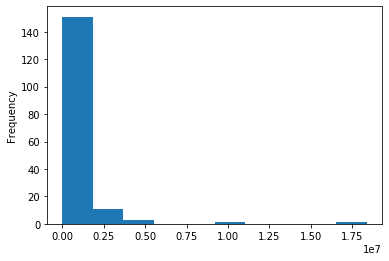

In [8]:
#Histograms
data['exports'].plot.hist()

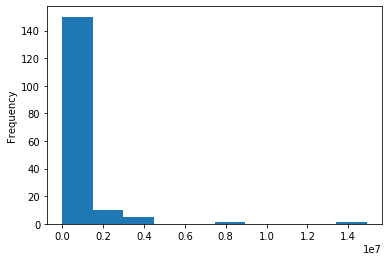

In [9]:
data['imports'].plot.hist()

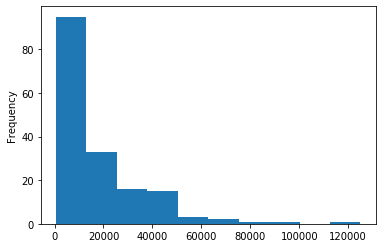

In [10]:
data['income'].plot.hist()

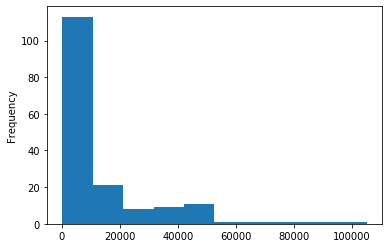

In [11]:
data['gdpp'].plot.hist()

## Multivariate

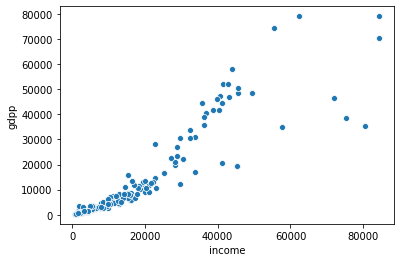

In [62]:
#Scatter plots
import seaborn as sns; 

ax = sns.scatterplot(x="income", y="gdpp", data=data)

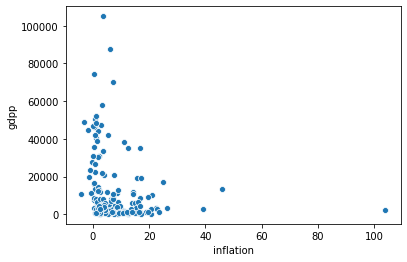

In [13]:
bx = sns.scatterplot(x="inflation", y="gdpp", data=data)

# 3. Prepare the data for modelling

## Outlier Treatment

In [14]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,1.670000e+02,167.000000,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7.420619e+05,105673.320419,6.588352e+05,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,1.797389e+06,180140.890556,1.471081e+06,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920e+02,1282.120000,6.510920e+01,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,4.471400e+04,7853.550000,6.402150e+04,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1.777440e+05,32188.600000,2.045580e+05,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7.278000e+05,97694.000000,7.719600e+05,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,1.837500e+07,866360.000000,1.491000e+07,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [15]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

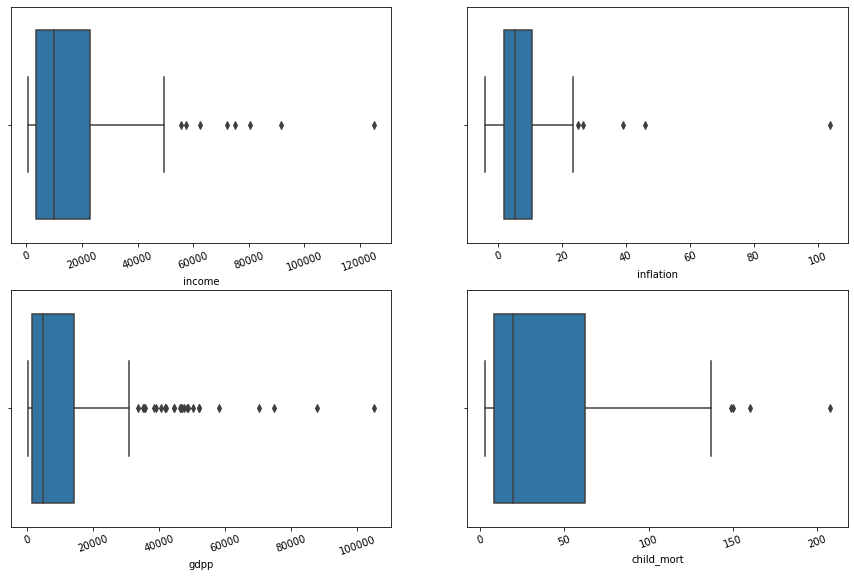

In [16]:
#Plotting for visualising to find out outliers
plt.figure(figsize=(15,20))
features = ['income', 'inflation', 'gdpp', 'child_mort']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.boxplot(x=i[1], data=data)
    plt.xticks(rotation = 20)

From the above boxplots we can observe the outliers present in the variables 

## Capping technique to handle the outliers

In [17]:
#capping
Q1 = data['gdpp'].quantile(0.01)
Q4 = data['gdpp'].quantile(0.99)
data['gdpp'][data['gdpp'] <= Q1]=Q1
data['gdpp'][data['gdpp'] >= Q4]=Q4
data.shape

C:\Users\RONU s\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(167, 10)

In [18]:
Q1 = data['income'].quantile(0.01)
Q4 = data['income'].quantile(0.99)
data['income'][data['income'] <= Q1]=Q1
data['income'][data['income'] >= Q4]=Q4
data.shape

C:\Users\RONU s\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RONU s\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(167, 10)

In [19]:
Q1 = data['inflation'].quantile(0.01)
Q4 = data['inflation'].quantile(0.99)
data['inflation'][data['inflation'] <= Q1]=Q1
data['inflation'][data['inflation'] >= Q4]=Q4
data.shape

C:\Users\RONU s\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RONU s\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(167, 10)

In [20]:
Q1 = data['child_mort'].quantile(0.01)
Q4 = data['child_mort'].quantile(0.99)
data['child_mort'][data['child_mort'] <= Q1]=Q1
data['child_mort'][data['child_mort'] >= Q4]=Q4
data.shape

C:\Users\RONU s\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RONU s\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(167, 10)

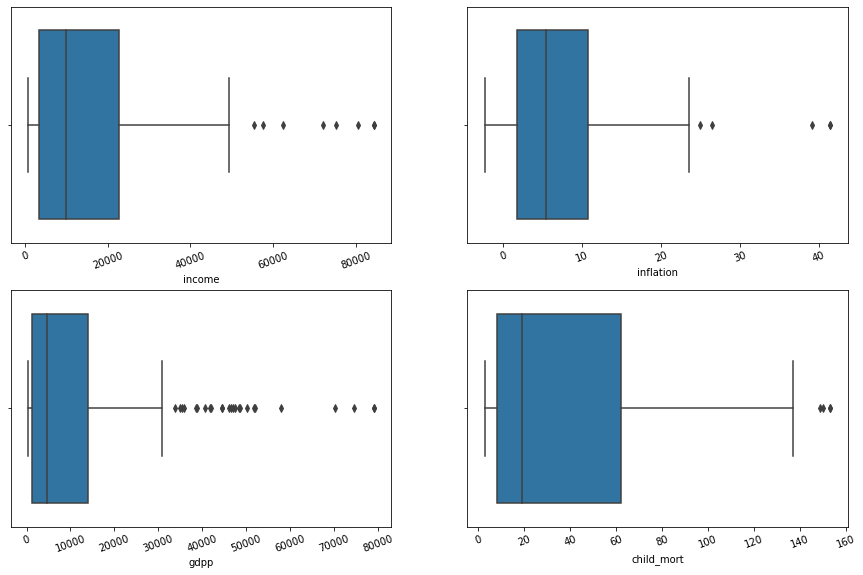

In [21]:
plt.figure(figsize=(15,20))
features = ['income', 'inflation', 'gdpp', 'child_mort']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.boxplot(x=i[1], data=data)
    plt.xticks(rotation = 20)

We can see that outliers are handled using capping.

In [22]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,1.670000e+02,167.000000,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.904790,7.420619e+05,105673.320419,6.588352e+05,16858.601677,7.397332,70.555689,2.947964,12757.456527
std,39.026793,1.797389e+06,180140.890556,1.471081e+06,17956.060832,7.770993,8.893172,1.513848,17429.755235
min,2.800000,1.076920e+02,1282.120000,6.510920e+01,742.240000,-2.348800,32.100000,1.150000,331.620000
25%,8.250000,4.471400e+04,7853.550000,6.402150e+04,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1.777440e+05,32188.600000,2.045580e+05,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7.278000e+05,97694.000000,7.719600e+05,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,153.400000,1.837500e+07,866360.000000,1.491000e+07,84374.000000,41.478000,82.800000,7.490000,79088.000000


## Scaling the data

In [23]:
data_scaled  = data.drop('country', axis = 1)

In [24]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data_scaled = standard_scaler.fit_transform(data_scaled)

In [25]:
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = ['child_mort','income','gdpp','exports','imports','inflation','life_expec','total_fer','health']
data_scaled.head()



,child_mort,income,gdpp,exports,imports,inflation,life_expec,total_fer,health
0,1.344012,-0.411011,-0.565040,-0.432276,-0.851772,0.263649,-1.619092,1.902882,-0.702314
1,-0.547543,-0.350191,-0.439218,-0.313677,-0.387025,-0.375251,0.647866,-0.859973,-0.498775
2,-0.272548,-0.318526,-0.484826,-0.353720,-0.221124,1.123260,0.670423,-0.038404,-0.477483
3,2.084186,-0.291375,-0.532363,-0.345953,-0.612136,1.936405,-1.179234,2.128151,-0.531000
4,-0.709457,-0.104331,-0.178771,0.040735,0.125202,-0.768917,0.704258,-0.541946,-0.032079


# K-Means Clustering

In [26]:
 #Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [27]:
#Let's check the Hopkins measure
hopkins(data.drop('country', axis = 1))

0.9905138255114655

### K- means Clustering

## Question-7: Look at the silhouette score plot and choose the optimal number of cluster

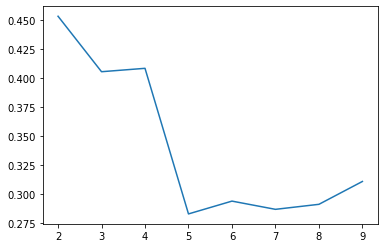

In [28]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(data_scaled)
    ss.append([k, silhouette_score(data_scaled, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

## Question-8: Look at the Elbow Curve plot and choose the optimal number of cluster

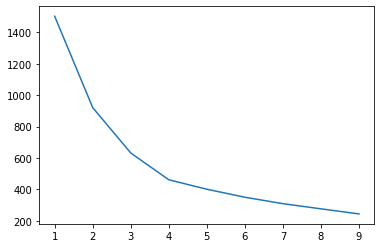

In [29]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(data_scaled)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

We can observe the location of bend(k) is at 3.

## KMeans with the K the we have choosed

In [30]:
#Let's perform K means using K=3
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [31]:
col = data_scaled.columns
col

Index(['child_mort', 'income', 'gdpp', 'exports', 'imports', 'inflation',
       'life_expec', 'total_fer', 'health'],
      dtype='object')

In [32]:
data_scaled.head()

,child_mort,income,gdpp,exports,imports,inflation,life_expec,total_fer,health
0,1.344012,-0.411011,-0.565040,-0.432276,-0.851772,0.263649,-1.619092,1.902882,-0.702314
1,-0.547543,-0.350191,-0.439218,-0.313677,-0.387025,-0.375251,0.647866,-0.859973,-0.498775
2,-0.272548,-0.318526,-0.484826,-0.353720,-0.221124,1.123260,0.670423,-0.038404,-0.477483
3,2.084186,-0.291375,-0.532363,-0.345953,-0.612136,1.936405,-1.179234,2.128151,-0.531000
4,-0.709457,-0.104331,-0.178771,0.040735,0.125202,-0.768917,0.704258,-0.541946,-0.032079


In [33]:
# Let's add the cluster Ids to the original data 
df_km = pd.concat([data.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
df_km.columns = ['country','child_mort', 'income', 'gdpp', 'exports', 'imports','inflation','life_expec','total_fer','health','cluster_id']
df_km.head()

,country,child_mort,income,gdpp,exports,imports,inflation,life_expec,total_fer,health,cluster_id
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,114520.0,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,171264.0,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,219919.0,10060.50,151437.0,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0,0


In [34]:
# Cross-check
df_km.isnull().sum()

country       0
child_mort    0
income        0
gdpp          0
exports       0
imports       0
inflation     0
life_expec    0
total_fer     0
health        0
cluster_id    0
dtype: int64

In [35]:
# Check the count of observation per cluster
df_km['cluster_id'].value_counts()

0    91
2    48
1    28
Name: cluster_id, dtype: int64

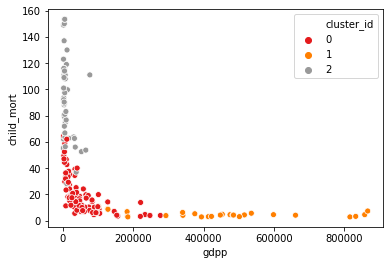

In [36]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

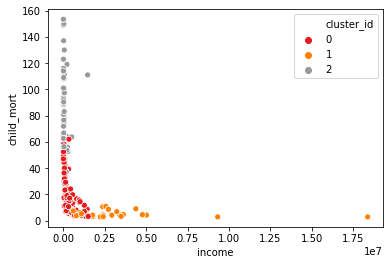

In [37]:
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

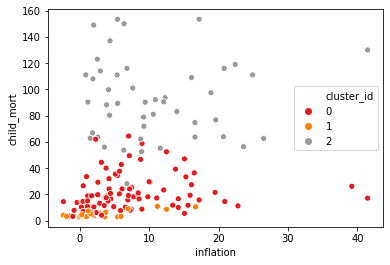

In [38]:
sns.scatterplot(x = 'inflation', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

## Cluster Profiling


In [39]:
df_km.head()

,country,child_mort,income,gdpp,exports,imports,inflation,life_expec,total_fer,health,cluster_id
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,114520.0,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,171264.0,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,219919.0,10060.50,151437.0,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0,0


In [40]:
df_km.groupby('cluster_id').mean()

,child_mort,income,gdpp,exports,imports,inflation,life_expec,total_fer,health
cluster_id,,,,,,,,,
0,20.357143,3.604149e+05,54727.945495,3.710446e+05,13968.021978,7.042409,73.460440,2.235055,7979.912088
1,5.053571,3.103824e+06,432716.321429,2.581810e+06,48466.000000,3.045793,80.514286,1.760714,46877.714286
2,90.335417,8.790635e+04,11482.176458,8.270288e+04,3901.010000,10.608604,59.239583,4.992083,1911.400833


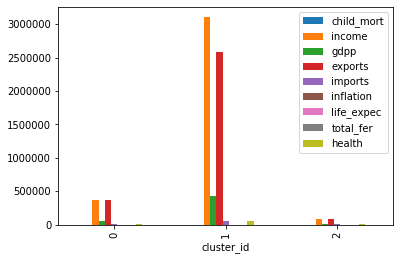

In [41]:
df_km.groupby('cluster_id').mean().plot(kind = 'bar')

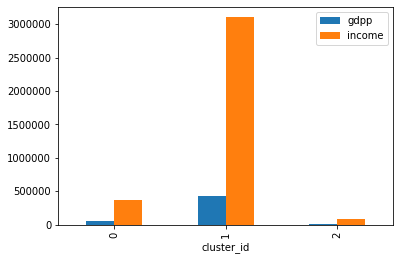

In [42]:
df_km[['gdpp','income', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

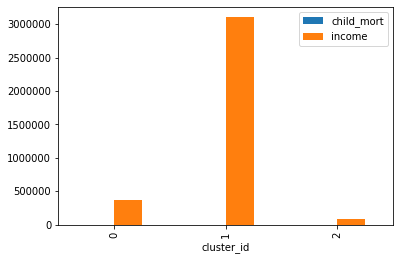

In [43]:
df_km[['child_mort','income', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

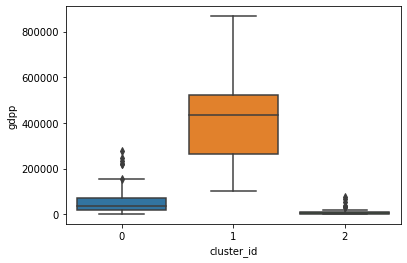

In [44]:
# plot
sns.boxplot(x='cluster_id', y='gdpp', data=df_km)

In [47]:
df_final_k= df_km[df_km['cluster_id']==2].sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])

In [48]:
df_final_k.head(10)

,country,child_mort,income,gdpp,exports,imports,inflation,life_expec,total_fer,health,cluster_id
50,Eritrea,55.2,2308.78,1282.12,11230.6,1420.00,11.600,61.7,4.61,482.00,2
93,Madagascar,62.2,10325.00,1557.01,17759.0,1390.00,8.790,60.8,4.60,413.00,2
31,Central African Republic,149.0,5262.80,1775.08,11819.0,888.00,2.010,47.5,5.21,446.00,2
112,Niger,123.0,7725.60,1795.68,17086.8,814.00,2.550,58.8,7.49,348.00,2
106,Mozambique,101.0,13198.50,2182.99,19357.8,918.00,7.640,54.5,5.56,419.00,2
116,Pakistan,92.1,14040.00,2288.00,20176.0,4280.00,10.900,65.3,3.85,1040.00,2
37,"Congo, Dem. Rep.",116.0,13727.40,2641.94,16566.4,742.24,20.800,57.5,6.54,334.00,2
26,Burundi,93.6,2060.52,2679.60,9055.2,764.00,12.300,57.7,6.26,331.62,2
94,Malawi,90.5,10465.20,3024.81,16019.1,1030.00,12.100,53.1,5.31,459.00,2
17,Benin,111.0,18040.40,3107.80,28197.6,1820.00,0.885,61.8,5.36,758.00,2


## Hierarchical Clustering

In [49]:
data_scaled.head()

,child_mort,income,gdpp,exports,imports,inflation,life_expec,total_fer,health
0,1.344012,-0.411011,-0.565040,-0.432276,-0.851772,0.263649,-1.619092,1.902882,-0.702314
1,-0.547543,-0.350191,-0.439218,-0.313677,-0.387025,-0.375251,0.647866,-0.859973,-0.498775
2,-0.272548,-0.318526,-0.484826,-0.353720,-0.221124,1.123260,0.670423,-0.038404,-0.477483
3,2.084186,-0.291375,-0.532363,-0.345953,-0.612136,1.936405,-1.179234,2.128151,-0.531000
4,-0.709457,-0.104331,-0.178771,0.040735,0.125202,-0.768917,0.704258,-0.541946,-0.032079


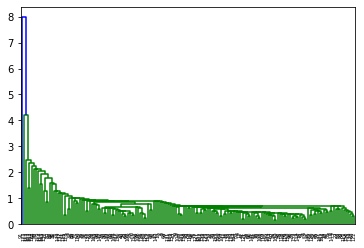

In [50]:
# single linkage
mergings = linkage(data_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

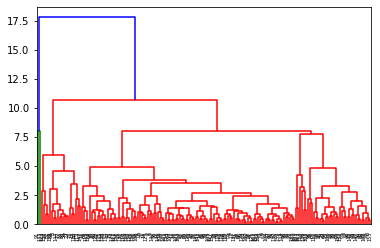

In [51]:
 # complete linkage
mergings = linkage(data_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [52]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [53]:
# assign cluster labels
df_km['cluster_labels'] = cluster_labels
df_km.head()

,country,child_mort,income,gdpp,exports,imports,inflation,life_expec,total_fer,health,cluster_id,cluster_labels
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,114520.0,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,171264.0,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,219919.0,10060.50,151437.0,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0,0,0


In [54]:
df_km.head()

,country,child_mort,income,gdpp,exports,imports,inflation,life_expec,total_fer,health,cluster_id,cluster_labels
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,114520.0,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,171264.0,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,219919.0,10060.50,151437.0,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0,0,0


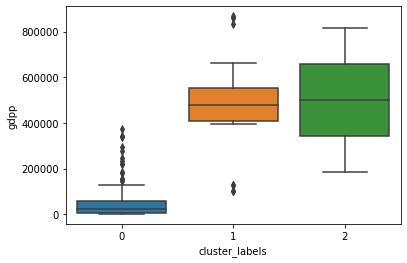

In [55]:
sns.boxplot(x='cluster_labels', y='gdpp', data=df_km)

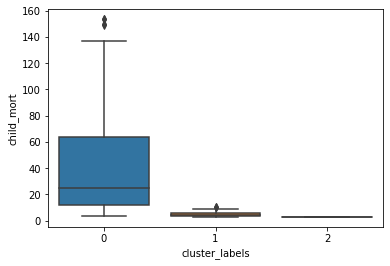

In [56]:
sns.boxplot(x='cluster_labels', y='child_mort', data=df_km)

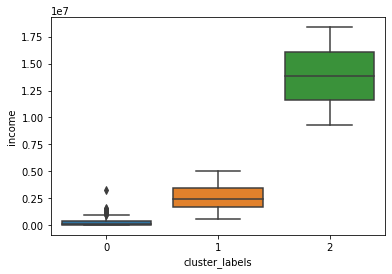

In [57]:
sns.boxplot(x='cluster_labels', y='income', data=df_km)

## Cluster Profiling

In [58]:
df_km.head()

,country,child_mort,income,gdpp,exports,imports,inflation,life_expec,total_fer,health,cluster_id,cluster_labels
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,114520.0,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,171264.0,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,219919.0,10060.50,151437.0,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0,0,0


In [59]:
df_final= df_km.drop('cluster_id', axis=1)
df_final

,country,child_mort,income,gdpp,exports,imports,inflation,life_expec,total_fer,health,cluster_labels
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610.0,9.440,56.2,5.82,553.0,0
1,Albania,16.6,114520.0,26789.50,198774.0,9930.0,4.490,76.3,1.65,4090.0,0
2,Algeria,27.3,171264.0,18598.20,140044.0,12900.0,16.100,76.5,2.89,4460.0,0
3,Angola,119.0,219919.0,10060.50,151437.0,5900.0,22.400,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100.0,1.440,76.8,2.13,12200.0,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,138402.0,15592.50,156519.0,2950.0,2.620,63.0,3.50,2970.0,0
163,Venezuela,17.1,384750.0,66285.00,237600.0,16500.0,41.478,75.4,2.47,13500.0,0
164,Vietnam,23.3,94320.0,8960.40,105062.0,4490.0,12.100,73.1,1.95,1310.0,0
165,Yemen,56.3,39300.0,6785.80,45064.0,4480.0,23.600,67.5,4.67,1310.0,0


In [60]:
df_new_final= df_final[df_final['cluster_labels']==0].sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])

In [61]:
# List of countries with most need of help
df_new_final.head(10).sort_values(by=['gdpp','child_mort','income'], ascending=True)

,country,child_mort,income,gdpp,exports,imports,inflation,life_expec,total_fer,health,cluster_labels
50,Eritrea,55.2,2308.780,1282.12,11230.6000,1420.00,11.60,61.7,4.61,482.00,0
93,Madagascar,62.2,10325.000,1557.01,17759.0000,1390.00,8.79,60.8,4.60,413.00,0
31,Central African Republic,149.0,5262.800,1775.08,11819.0000,888.00,2.01,47.5,5.21,446.00,0
112,Niger,123.0,7725.600,1795.68,17086.8000,814.00,2.55,58.8,7.49,348.00,0
107,Myanmar,64.4,107.692,1946.36,65.1092,3720.00,7.04,66.8,2.41,988.00,0
106,Mozambique,101.0,13198.500,2182.99,19357.8000,918.00,7.64,54.5,5.56,419.00,0
116,Pakistan,92.1,14040.000,2288.00,20176.0000,4280.00,10.90,65.3,3.85,1040.00,0
37,"Congo, Dem. Rep.",116.0,13727.400,2641.94,16566.4000,742.24,20.80,57.5,6.54,334.00,0
12,Bangladesh,49.4,12128.000,2668.16,16524.4000,2440.00,7.14,70.4,2.33,758.00,0
26,Burundi,93.6,2060.520,2679.60,9055.2000,764.00,12.30,57.7,6.26,331.62,0


### By Hierarchical clustering we get the list of countries which are need of the help . 
### The top 5 countries in that list are 
    

1. Eritrea
2. Madagascar
3. Centra Afrian Republic
4. Niger
5. Myanmar